원본 코드 주소 : [LSTM을 활용한 주식가격 예측](https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/)

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# (1) 데이터 불러오기

In [9]:
url = 'https://raw.githubusercontent.com/jooeungen/coronaboard_kr/master/kr_daily.csv'
stocks = pd.read_csv(url, sep=',', error_bad_lines=False) #error_bad_line 옵션을 False로 하면 오류가 발생한 줄을 빼고 처리함.
stocks

,date,confirmed,death,released,tested,negative,critical
0,20200121,1,0,0,1,0,NaN
1,20200122,1,0,0,1,0,NaN
2,20200123,1,0,0,1,0,NaN
3,20200124,2,0,0,2,0,NaN
4,20200125,2,0,0,2,0,NaN
...,...,...,...,...,...,...,...
461,20210426,119386,1817,108850,8672978,8475508,132.0
462,20210427,119898,1820,109695,8721609,8525203,156.0
463,20210428,120667,1821,110248,8766498,8568665,160.0
464,20210429,121346,1825,110787,8805779,8604041,157.0


# (2) 데이터 전처리 및 시각화

In [10]:
stocks['date'] = pd.to_datetime(stocks['date'], format='%Y%m%d')
# stocks['일자'] = pd.to_datetime(stocks['일자'], format='%Y-%m-%d')
#stocks['연도'] = stocks['일자'].dt.year
stocks['date']

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
461   2021-04-26
462   2021-04-27
463   2021-04-28
464   2021-04-29
465   2021-04-30
Name: date, Length: 466, dtype: datetime64[ns]

In [11]:
df = stocks.loc[stocks['date']>="2020-3"]
# df = stocks.loc[(stocks['일자']>="1990") & (df['column_name'] <= B)]
df

,date,confirmed,death,released,tested,negative,critical
40,2020-03-01,3736,18,30,98921,61825,NaN
41,2020-03-02,4212,22,31,109591,71580,NaN
42,2020-03-03,4812,28,34,125851,85484,NaN
43,2020-03-04,5328,32,41,136707,102965,NaN
44,2020-03-05,5766,35,88,146541,118965,NaN
...,...,...,...,...,...,...,...
461,2021-04-26,119386,1817,108850,8672978,8475508,132.0
462,2021-04-27,119898,1820,109695,8721609,8525203,156.0
463,2021-04-28,120667,1821,110248,8766498,8568665,160.0
464,2021-04-29,121346,1825,110787,8805779,8604041,157.0


In [12]:
df.columns

Index(['date', 'confirmed', 'death', 'released', 'tested', 'negative',
       'critical'],
      dtype='object')

Text(0, 0.5, 'death')

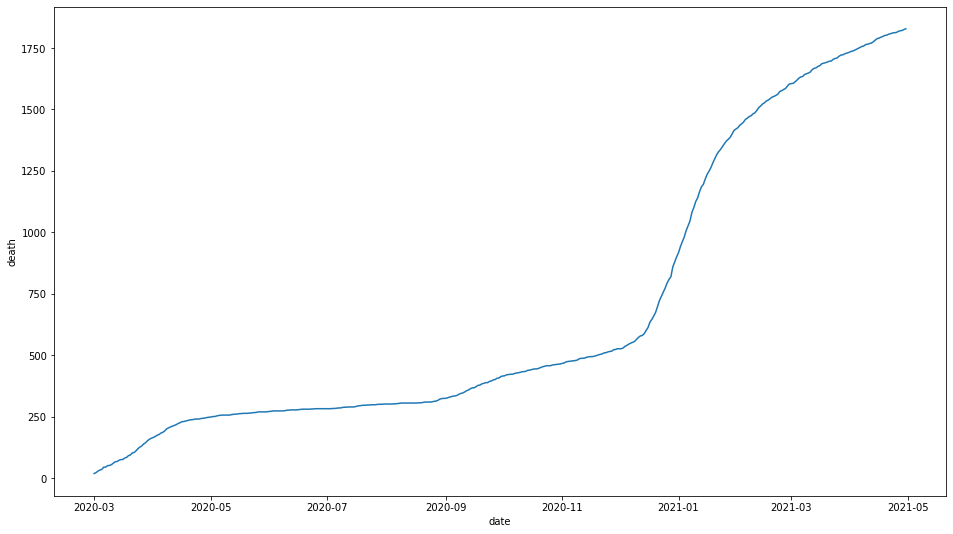

In [13]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['death'], x=df['date'])
plt.xlabel('date')
plt.ylabel('death')

Text(0, 0.5, 'confirmed')

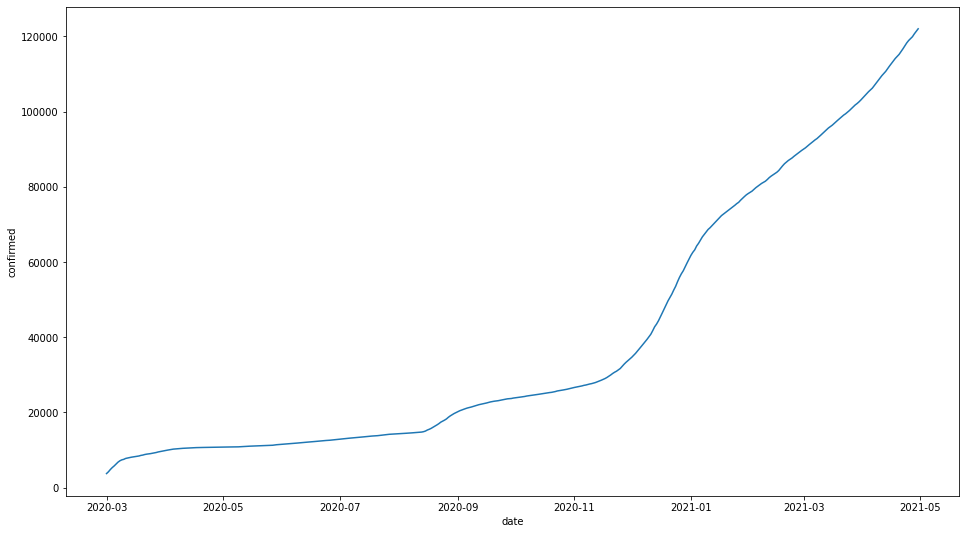

In [14]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['confirmed'], x=df['date'])
plt.xlabel('date')
plt.ylabel('confirmed')

# (3) 데이터 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['confirmed', 'death', 'released', 'tested', 'negative']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,confirmed,death,released,tested,negative
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004025,0.002210,0.000009,0.001220,0.001137
2,0.009098,0.005525,0.000036,0.003078,0.002757
3,0.013461,0.007735,0.000099,0.004319,0.004794
4,0.017164,0.009392,0.000521,0.005443,0.006658
...,...,...,...,...,...
421,0.977839,0.993923,0.976910,0.979963,0.980393
422,0.982168,0.995580,0.984496,0.985521,0.986184
423,0.988670,0.996133,0.989461,0.990651,0.991248
424,0.994411,0.998343,0.994299,0.995141,0.995370


# (4) 시계열 데이터의 데이터셋 분리

In [16]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

train

,confirmed,death,released,tested,negative
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004025,0.002210,0.000009,0.001220,0.001137
2,0.009098,0.005525,0.000036,0.003078,0.002757
3,0.013461,0.007735,0.000099,0.004319,0.004794
4,0.017164,0.009392,0.000521,0.005443,0.006658
...,...,...,...,...,...
221,0.174903,0.225967,0.201388,0.261724,0.265863
222,0.175360,0.226519,0.202339,0.263026,0.267216
223,0.175969,0.227624,0.202833,0.263535,0.267926
224,0.176459,0.228729,0.203453,0.264198,0.268558


In [17]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [18]:
from sklearn.model_selection import train_test_split

feature_cols = ['confirmed', 'released', 'tested', 'negative']
label_cols = ['death']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((164, 20, 4), (42, 20, 4))

In [19]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 4), (200, 1))

In [20]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

# (5) 모형 학습

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [22]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])
#model.save(filename)

Epoch 1/200
11/11 [==============================] - 2s 61ms/step - loss: 0.0161 - val_loss: 0.0057

Epoch 00001: val_loss improved from inf to 0.00572, saving model to model/tmp_checkpoint.h5
Epoch 2/200
11/11 [==============================] - 0s 13ms/step - loss: 0.0043 - val_loss: 4.3264e-04

Epoch 00002: val_loss improved from 0.00572 to 0.00043, saving model to model/tmp_checkpoint.h5
Epoch 3/200
11/11 [==============================] - 0s 13ms/step - loss: 2.3451e-04 - val_loss: 6.1061e-04

Epoch 00003: val_loss did not improve from 0.00043
Epoch 4/200
11/11 [==============================] - 0s 13ms/step - loss: 4.6645e-04 - val_loss: 3.1352e-04

Epoch 00004: val_loss improved from 0.00043 to 0.00031, saving model to model/tmp_checkpoint.h5
Epoch 5/200
11/11 [==============================] - 0s 13ms/step - loss: 1.7911e-04 - val_loss: 1.9955e-04

Epoch 00005: val_loss improved from 0.00031 to 0.00020, saving model to model/tmp_checkpoint.h5
Epoch 6/200
11/11 [=================

# (6) 예측

In [23]:
model.load_weights(filename)

pred = model.predict(test_feature)

pred.shape

(180, 1)

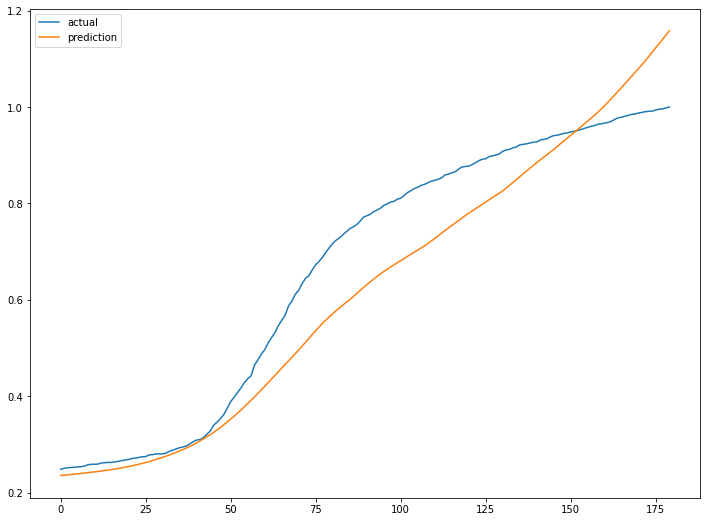

In [24]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()